#Times Higher Education Global Ranking Analysis

## About Dataset

The notebook features data visualisation and analysis I conducted on THE World University Rankings data sourced from Kaggle. The dataset consisted of 12 separate CSV files, each representing data from a different year from 2011-2023.

The THE World University Rankings provide the definitive list of the world’s best universities, with an emphasis on the research mission. It is the only global university league table to judge research-intensive universities across all of their core missions: teaching (the learning environment); research (volume, income and reputation); citations (research influence); industry income (knowledge transfer) and international outlook (staff, students and research). It uses 13 carefully calibrated performance indicators to provide the most comprehensive and balanced comparisons. The overall list is accompanied by 11 subject-specific rankings

#Loading, Inspecting and Merging THE data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
folder_path = '/content/drive/MyDrive/THE/'

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Merge 2011-2024 data together
years = range(2011, 2024)

# Create an empty DataFrame to hold the merged data
merged_df = pd.DataFrame()

# Loop through each year and read the corresponding CSV file
for year in years:
    # Create the full path to the CSV file
    file_path = f'{folder_path}/{year}_rankings.csv'

    df = pd.read_csv(file_path)

    # Add a 'year' column to indicate the year of the rankings
    df['year'] = year

    merged_df = pd.concat([merged_df, df], ignore_index=True)

In [5]:
#summary statistics
merged_df.describe()

,rank_order,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook_rank,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,year,stats_student_staff_ratio
count,1.332500e+04,1.332500e+04,12329.000000,13325.000000,13325.000000,13325.000000,12329.000000,13325.000000,12329.000000,13325.000000,13325.000000,11521.000000
mean,8.008573e+04,8.008690e+04,30.214081,576.930507,576.930507,576.930507,26.446387,576.930507,51.064717,576.930507,2019.321351,18.939849
std,2.615863e+05,2.615859e+05,15.321563,460.183347,460.183347,460.183347,19.043454,460.183347,27.498073,460.183347,3.220529,17.579755
min,1.000000e+00,1.000000e+00,8.200000,0.000000,0.000000,0.000000,0.800000,0.000000,0.700000,0.000000,2011.000000,0.300000
25%,1.050000e+03,1.050000e+03,19.200000,180.000000,180.000000,180.000000,12.300000,180.000000,26.400000,180.000000,2017.000000,12.300000
50%,5.800000e+03,5.800000e+03,25.400000,483.000000,483.000000,483.000000,20.200000,483.000000,50.900000,483.000000,2020.000000,16.400000
75%,1.069000e+04,1.069000e+04,36.400000,914.000000,914.000000,914.000000,34.100000,914.000000,74.400000,914.000000,2022.000000,22.100000
max,1.000544e+06,1.000544e+06,99.700000,1799.000000,1799.000000,1799.000000,99.700000,1799.000000,100.000000,1799.000000,2023.000000,865.800000


In [6]:
merged_df.dtypes

rank_order                             int64
rank                                  object
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_international_outlook          object
scores_international_outlook_rank      int64
scores_industry_income                object
scores_industry_income_rank            int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
location                              object
aliases                               object
subjects_offered                      object
closed                                  bool
unaccredited                            bool
year                                   int64
stats_number_students                 object
stats_stud

In [7]:
#Converting some score columns to numeric datatype
merged_df[['scores_overall', 'scores_international_outlook', 'scores_industry_income']] = merged_df[['scores_overall', 'scores_international_outlook', 'scores_industry_income']].apply(pd.to_numeric, errors='coerce')


In [8]:
#Ensuring name consistency
name_counts = merged_df.groupby('name')['year'].nunique()
name_counts

name
AECC University College                      1
AGH University of Science and Technology     8
AKFA University                              1
Aalborg University                          12
Aalto University                            12
                                            ..
Örebro University                            8
Üsküdar University                           2
Ştefan cel Mare University of Suceava        1
​Shahid Chamran University of Ahvaz          4
​Wellspring University                       1
Name: year, Length: 2628, dtype: int64

In [9]:
# Checking for missing values in each column
missing_values = merged_df.isnull().sum()

# Display columns with missing values and the number of missing entries
missing_values[missing_values > 0]


scores_overall                  10118
scores_teaching                   996
scores_international_outlook     1005
scores_industry_income           1177
scores_research                   996
scores_citations                  996
subjects_offered                   49
stats_number_students            1803
stats_student_staff_ratio        1804
stats_pc_intl_students           1803
stats_female_male_ratio          2330
dtype: int64

In [10]:
merged_df.to_csv('/content/drive/MyDrive/THE/merged_df.csv')


# EDA

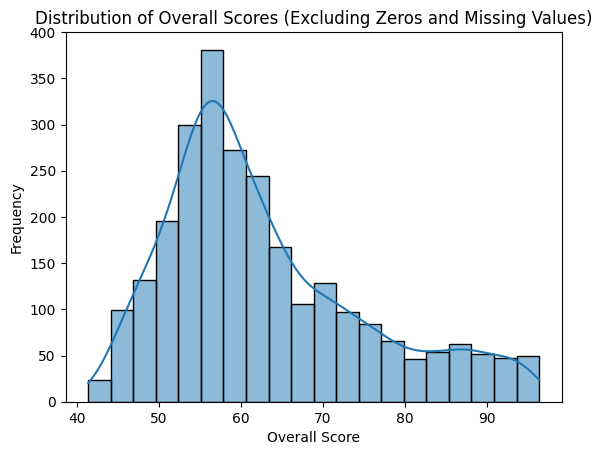

In [11]:

# Filter out zeros and drop missing values for this plot, distribution of overall scores over 2011-2023
sns.histplot(merged_df[merged_df['scores_overall'] > 0]['scores_overall'].dropna(), bins=20, kde=True)
plt.title('Distribution of Overall Scores (Excluding Zeros and Missing Values)')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
plt.show()



## Mean scores for each metric changing through 2011-2023

<ipython-input-12-0a521f7cd4b3>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_yearly_mean = df[df[col] > 0].groupby('year').mean()
<ipython-input-12-0a521f7cd4b3>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_yearly_mean = df[df[col] > 0].groupby('year').mean()
<ipython-input-12-0a521f7cd4b3>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_yearly_mean = df[df[col] > 0].groupby('year')

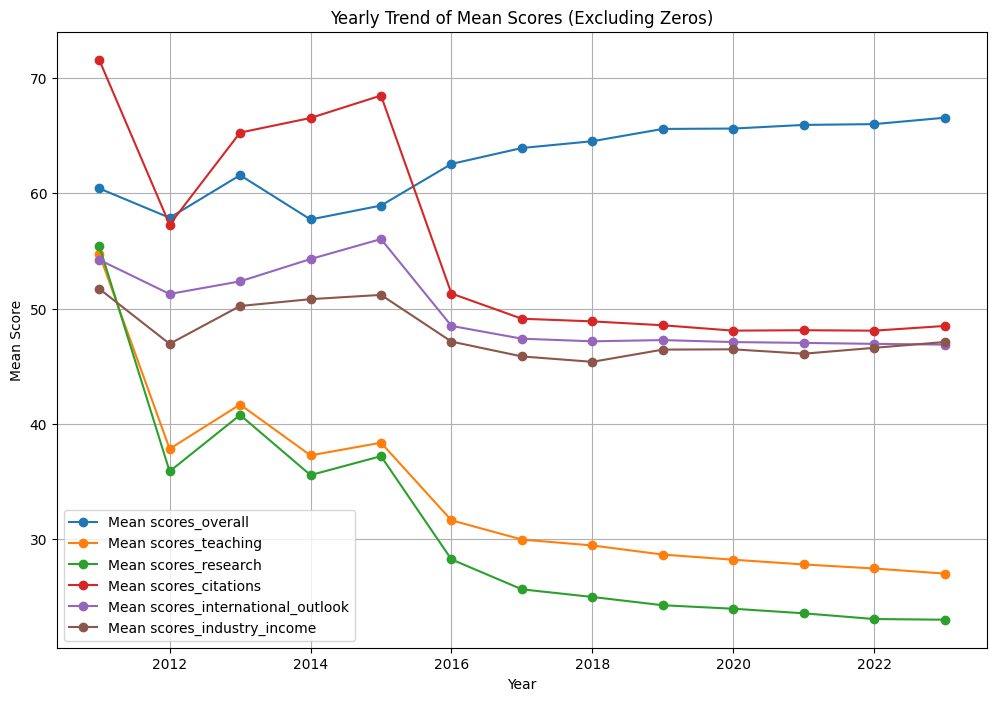

In [12]:
#Mean scores for each score changing through the years
def plot_filtered_yearly_mean(df, score_columns):
    plt.figure(figsize=(12, 8))

    for col in score_columns:
        # Calculate the yearly mean, excluding zeros
        filtered_yearly_mean = df[df[col] > 0].groupby('year').mean()

        plt.plot(filtered_yearly_mean.index, filtered_yearly_mean[col], marker='o', label=f'Mean {col}')

    plt.title('Yearly Trend of Mean Scores (Excluding Zeros)')
    plt.xlabel('Year')
    plt.ylabel('Mean Score')
    plt.legend()
    plt.grid(True)
    plt.show()

score_columns = ['scores_overall', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_international_outlook', 'scores_industry_income']


plot_filtered_yearly_mean(merged_df, score_columns)


##Top 10 Computer Science Universities over the last 5 years

In [13]:
#Top 10 Computer Science universities over the last 5 years.

# Create a copy of the original merged DataFrame
merged_df_copy = merged_df.copy()

# Convert the 'rank' column to numeric in the copy DataFrame
merged_df_copy['rank'] = pd.to_numeric(merged_df_copy['rank'], errors='coerce')

# Identify the top 10 universities in 2019 for Computer Science
top_10_unis_2019 = merged_df_copy[(merged_df_copy['year'] == 2019) & (merged_df_copy['subjects_offered'].str.contains('Computer Science', case=False, na=False))]
top_10_unis_2019 = top_10_unis_2019.nsmallest(10, 'rank')['name'].tolist()

# Filter to include only those top 10 universities from 2019 for the years 2019-2023
last_5_years = [2019, 2020, 2021, 2022, 2023]
subset_df_last_5_years = merged_df_copy[(merged_df_copy['year'].isin(last_5_years)) & (merged_df_copy['name'].isin(top_10_unis_2019))]

# Handle universities that share a rank by filling forward
subset_df_last_5_years = subset_df_last_5_years.sort_values(by=['name', 'year'])
subset_df_last_5_years['rank'] = subset_df_last_5_years.groupby('name')['rank'].ffill()

#plot
fig = px.line(subset_df_last_5_years,
              x='year',
              y='rank',
              color='name',
              hover_name='name',
              line_dash_sequence=["solid", "dash", "dot", "dashdot"],
              markers=True)

#hover data
fig.update_traces(
    hoverinfo='x+y+name',
    customdata=subset_df_last_5_years['scores_overall'],
    hovertemplate="Year: %{x}<br>Rank: %{y}<br>University: %{hovertext}<br>Overall Score: %{customdata}"
)


fig.update_layout(
    title='Top 10 University Ranks in Computer Science Over the Last 5 Years (Based on 2019)',
    xaxis_title='Year',
    yaxis_title='Rankings',
    xaxis=dict(tickmode='array', tickvals=list(range(2019, 2024))),
    yaxis=dict(autorange="reversed", tickmode='array', tickvals=list(range(1, 14)))
)


fig.show()



##Example of a Radar Chart for University Profile

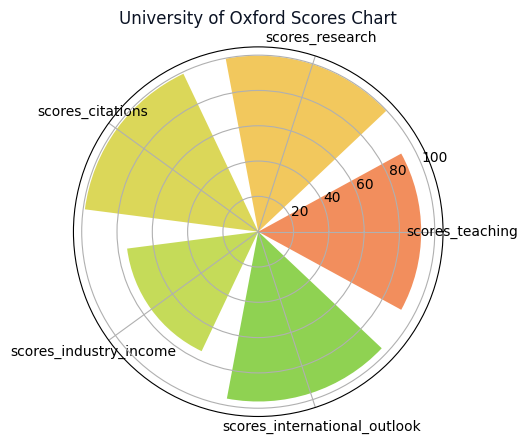

In [14]:


# Filter the DataFrame to only include data for the year 2023
df_2023 = merged_df[merged_df['year'] == 2023]

# Create a sub-dataframe for the radar chart, focusing on Oxford in 2023
oxford_2023 = df_2023[df_2023['name'] == 'University of Oxford']
polar23_df = oxford_2023[['name', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook']]

# Function to plot the radar chart
def plot_radar_chart(uni_name, index):
    ax = plt.subplot(projection='polar')
    categories = ['scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook']
    values = polar23_df.iloc[index, :].tolist()[1:]
    width = [1, 1, 1, 1, 1]
    colors = ['#ed5f18', '#edb118', '#ccc612', '#adcc12', '#60bf08']

    # Create an array of angles for the radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
    ax.bar(angles, values, width=width, bottom=0.0, alpha=0.7, color=colors)
    ax.set_thetagrids(angles * 180 / np.pi, categories)
    ax.set_title(f'{uni_name} Scores Chart', pad=5, color='#0b1324')

    plt.show()

# Plot
plot_radar_chart('University of Oxford', 0)

### I'm going to clean the ranked column below as rank is stored in multiple ways making it difficult to visualise and analyse.

In [15]:
#Clean rank column

def clean_rank(rank_str):
    # Check for NaN values first
    if pd.isna(rank_str):
        return np.nan
    try:
        # If the rank is already a number, return it as is
        return int(rank_str)
    except ValueError:
        # If the rank is a range like '201-225'
        if '-' in rank_str:
            lower, upper = map(int, rank_str.split('-'))
            return int((lower + upper) / 2)
        # If the rank has a non-standard range character like '201â€“250'
        elif '–' in rank_str:
            lower, upper = map(int, rank_str.split('–'))
            return int((lower + upper) / 2)
        # If the rank is denoted as equal like '=10'
        elif '=' in rank_str:
            return int(rank_str.replace('=', ''))
        else:
            return np.nan

# Apply the function to the 'rank' column
merged_df['cleaned_rank'] = merged_df['rank'].apply(clean_rank)
merged_df = merged_df.dropna(subset=['cleaned_rank'])

## Number of students at top 10 universities in the last three years.


<ipython-input-16-c9204b625a22>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-c9204b625a22>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



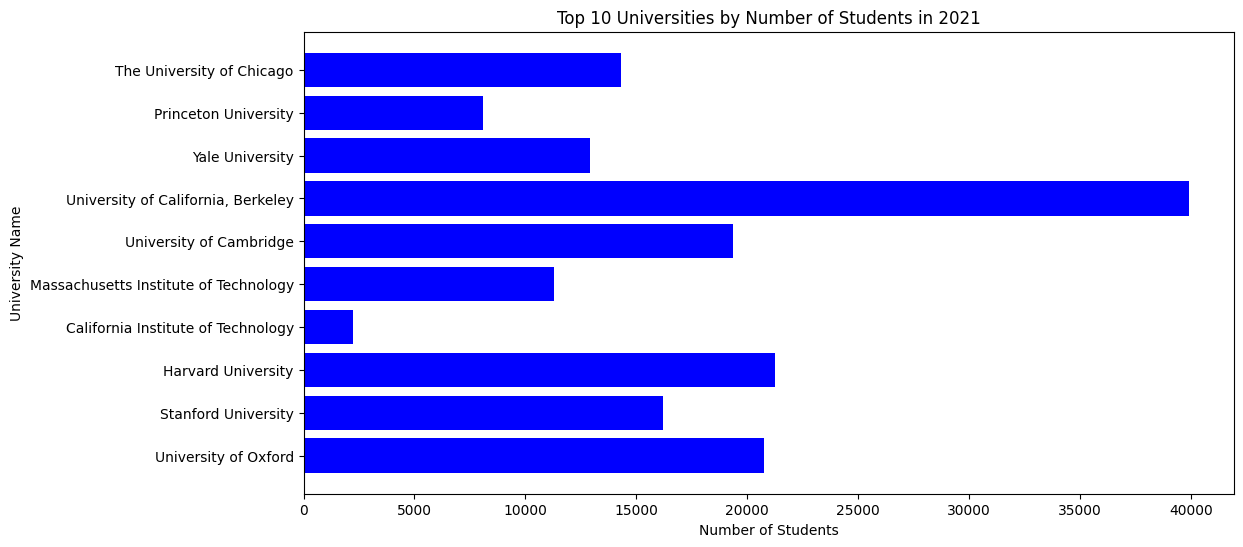

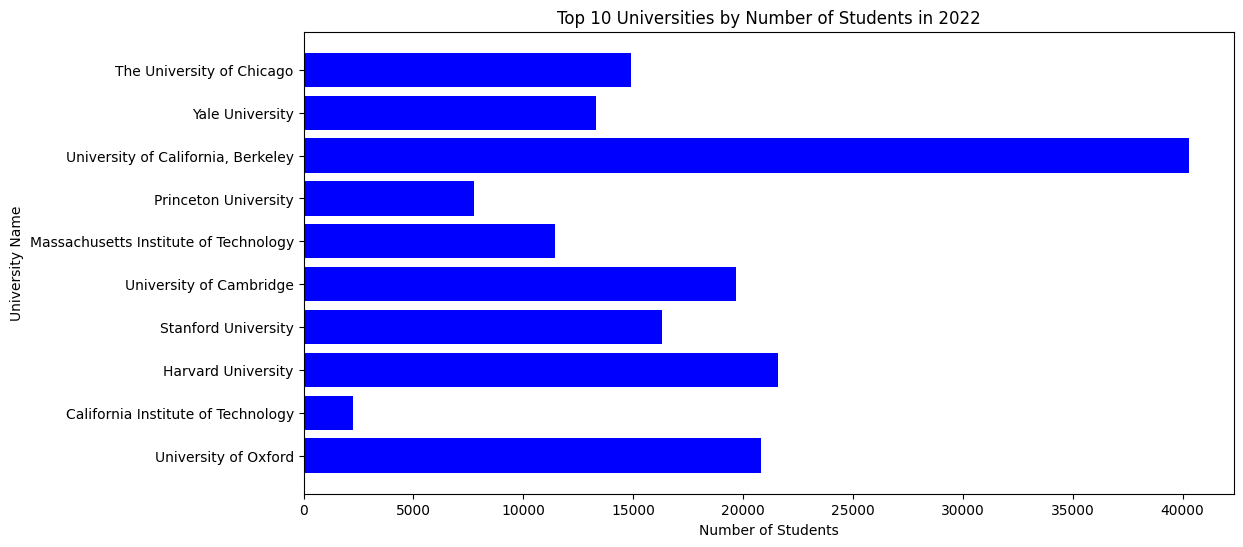

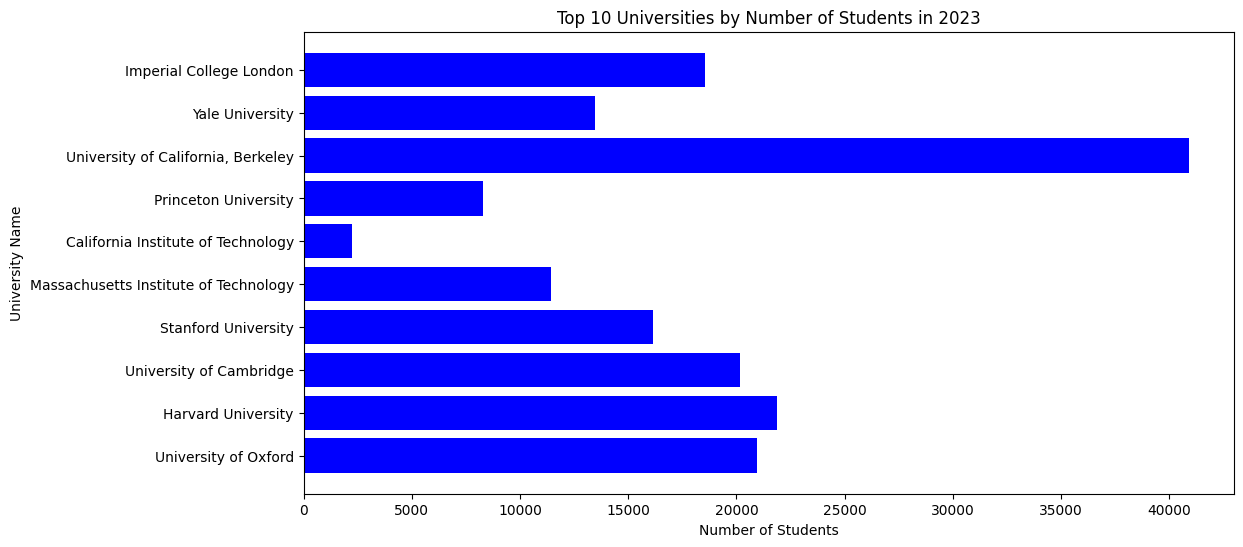

In [16]:

# Convert the column back to string type
merged_df['stats_number_students'] = merged_df['stats_number_students'].astype(str)

merged_df['stats_number_students'] = pd.to_numeric(merged_df['stats_number_students'].str.replace(',', ''), errors='coerce')

# Filter the DataFrame to only include the last 3 years
last_3_years = [2021, 2022, 2023]
subset_df_last_3_years = merged_df[merged_df['year'].isin(last_3_years)]

# Sort the DataFrame by year and rank
subset_df_last_3_years = subset_df_last_3_years.sort_values(by=['year', 'cleaned_rank'])

# Loop through each of the last 3 years
for year in last_3_years:
    # Filter to include only the data for that year
    df_year = subset_df_last_3_years[subset_df_last_3_years['year'] == year]

    # Get the top 10 universities for that year
    top_10_unis = df_year.nsmallest(10, 'cleaned_rank')

    # Plot Bar Chart
    plt.figure(figsize=(12, 6))
    plt.barh(top_10_unis['name'], top_10_unis['stats_number_students'], color='blue')
    plt.xlabel('Number of Students')
    plt.ylabel('University Name')
    plt.title(f'Top 10 Universities by Number of Students in {year}')
    plt.show()


## Comparison between percentage of internatioanal students in UK and USA.


<ipython-input-17-8c534d2adfad>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



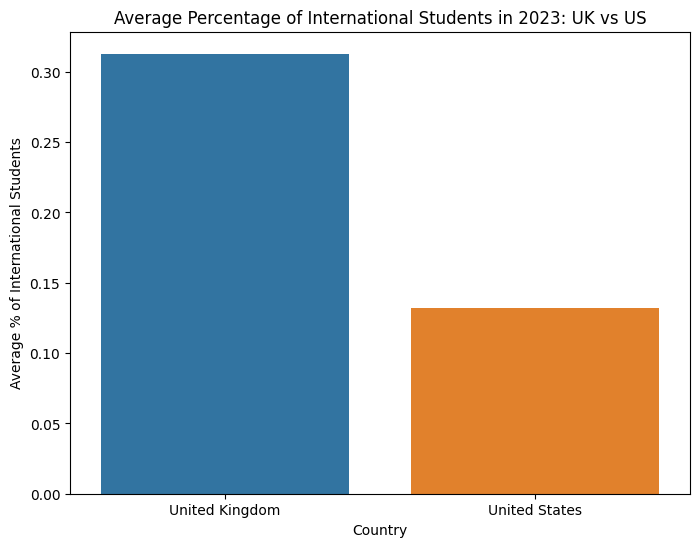

In [17]:
# Filter the data for the year 2023 and for the UK and USA
geo_df_2023 = merged_df[(merged_df['year'] == 2023) & (merged_df['location'].isin(['United Kingdom', 'United States']))]

# Convert the 'stats_pc_intl_students' to float after stripping the '%' sign
geo_df_2023['stats_pc_intl_students'] = geo_df_2023['stats_pc_intl_students'].str.rstrip('%').astype('float') / 100.0

# Calculate the mean percentage of international students for each country
mean_intl_students = geo_df_2023.groupby('location')['stats_pc_intl_students'].mean().reset_index()

# Plot the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='location', y='stats_pc_intl_students', data=mean_intl_students)
plt.title('Average Percentage of International Students in 2023: UK vs US')
plt.xlabel('Country')
plt.ylabel('Average % of International Students')
plt.show()


#Industry income vs Research Output top 100 Universities

In [18]:
top_100_df_2023 = merged_df[(merged_df['year'] == 2023) & (merged_df['cleaned_rank'] <= 100)]

# Create the scatter plot with hover functionality
fig = px.scatter(top_100_df_2023,
                 x='scores_industry_income',
                 y='scores_research',
                 color='location',
                 hover_data=['name', 'cleaned_rank'],
                 title='Industry Income vs. Research Output for Top 100 Universities in 2023')

# Customise plot
fig.update_layout(
    xaxis_title='Industry Income Score',
    yaxis_title='Research Score',
    legend_title='Location',
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        font=dict(size=12,),
    )
)


fig.show()

In [19]:
# Filter the data to include only the top 100 universities in the year 2023
df_top100_2023 = merged_df[(merged_df['year'] == 2023) & (merged_df['cleaned_rank'] <= 100)]

# Check if there are enough data points for the year 2023 and top 100 universities
df_top100_2023.shape

country_count = df_top100_2023['location'].value_counts().reset_index()
country_count.columns = ['location', 'num_universities']

# Creating the modified Choropleth map
fig = px.choropleth(country_count,
                    locations='location',
                    locationmode='country names',
                    color='num_universities',
                    hover_name='location',
                    color_continuous_scale='Viridis',
                    title='Number of Top 100 Universities by Country in 2023 According to THE Rankings',
                    labels={'num_universities':'Number of Universities'},
                    projection='natural earth')


fig.show()


#Key metrics influencing rankings
### I will attempt to use machine learning techniques to identify which numeric metrcs most influence university ranking.


In [20]:

selected_features = [
    'scores_teaching',
    'scores_international_outlook',
    'scores_industry_income',
    'scores_research',
    'scores_citations',
    'stats_number_students',
    'cleaned_rank'  # Target variable
]

# Filter the DataFrame to only include the selected features
df_selected = merged_df[selected_features]

# Check for missing values in the selected features
missing_values = df_selected.isnull().sum()
missing_values


scores_teaching                    0
scores_international_outlook       9
scores_industry_income           181
scores_research                    0
scores_citations                   0
stats_number_students           1803
cleaned_rank                       0
dtype: int64

In [21]:
df_selected.dtypes

scores_teaching                 float64
scores_international_outlook    float64
scores_industry_income          float64
scores_research                 float64
scores_citations                float64
stats_number_students           float64
cleaned_rank                    float64
dtype: object

In [22]:

# List of numerical features, I'm going to use Imputation to replace missing values.
numerical_features = [
    'scores_teaching',
    'scores_international_outlook',
    'scores_industry_income',
    'scores_research',
    'scores_citations',
    'stats_number_students',
]

df_selected = merged_df[selected_features].copy()
# Explicitly convert the 'stats_number_students' column to string type
df_selected['stats_number_students'] = df_selected['stats_number_students'].astype(str)

# Remove commas from the 'stats_number_students' column and convert it to float
df_selected['stats_number_students'] = df_selected['stats_number_students'].str.replace(',', '').astype(float)



# Custom imputation based on the rank
for feature in numerical_features:
    df_selected[feature] = df_selected.groupby('cleaned_rank')[feature].transform(lambda x: x.fillna(x.mean()))

# Handle cases where all values in the group are NaN
for feature in numerical_features:
    mean_value = df_selected[feature].mean()
    df_selected[feature].fillna(mean_value, inplace=True)


In [23]:
df_selected.head()

,scores_teaching,scores_international_outlook,scores_industry_income,scores_research,scores_citations,stats_number_students,cleaned_rank
0,99.7,72.4,34.500000,98.7,98.8,18239.125000,1.0
1,97.7,54.6,83.700000,98.0,99.9,13710.888889,2.0
2,97.8,82.3,87.500000,91.4,99.9,15752.888889,3.0
3,98.3,29.5,64.300000,98.1,99.2,13889.666667,4.0
4,90.9,70.3,84.484615,95.4,99.9,11197.222222,5.0


In [24]:
'#standardise data'

from sklearn.preprocessing import StandardScaler

# Separate features and target variable without dropping 'Unnamed: 0' this time
X = df_selected.drop(['cleaned_rank'], axis=1)
y = df_selected['cleaned_rank']

# Standardise the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()



,scores_teaching,scores_international_outlook,scores_industry_income,scores_research,scores_citations,stats_number_students
0,4.257029,0.880715,-0.749095,3.551079,1.673117,-0.195223
1,4.129925,0.099728,1.874866,3.514992,1.719178,-0.381548
2,4.136280,1.315084,2.077530,3.174739,1.719178,-0.297525
3,4.168056,-1.001551,0.840215,3.520147,1.689866,-0.374191
4,3.697772,0.788576,1.916712,3.380953,1.719178,-0.484978


In [25]:
#train/test split
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (30% of the data will be used for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Show the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape




((7081, 6), (3036, 6), (7081,), (3036,))

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialise the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Get the coefficients
coefficients = lr.coef_

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

coefficients_df, mse, r2



(                        Feature  Coefficient
 0               scores_teaching   -62.284283
 1  scores_international_outlook   -41.700093
 2        scores_industry_income   -14.912213
 3               scores_research   -78.847307
 4              scores_citations  -162.030786
 5         stats_number_students    -1.955272,
 32825.97933029608,
 0.7109844663124836)

### MSE of 32825 and an R^2 of 0.71.